In [8]:
from cv2 import rotate, flip, ROTATE_90_CLOCKWISE, ROTATE_180, ROTATE_90_COUNTERCLOCKWISE
from random import Random
from numpy import array, concatenate
from torch import uint8
from numpy import array, transpose
from typing import Any, Callable, Optional, Tuple, Union
from PIL import Image
from torch.utils.data import DataLoader
from utils.datasets import CIFAR10, ImageNet, FashionMNIST, INTEL

## CIFAR10

In [9]:
# class CIFAR10(CIFAR10):
#     def __init__(self, duplicate_ratio=0, rotations=False, seed=None, *args, **kwargs):
#         super().__init__(*args, **kwargs)

#         self.random = Random(seed)
#         self.rotations = rotations
            
#         if duplicate_ratio > 0:

#             if rotations < 0 or rotations > 1:
#                 raise ValueError("Rotations probability must be in the range (0, 1]")
            
#             # pick sample from images acording to ratio
#             dup_images = []
#             dup_targets = []
#             while duplicate_ratio > 1:
#                 dup_images += self.data
#                 dup_targets += self.targets
#                 duplicate_ratio -= 1

            
#             indx = []
#             indx += self.random.sample([x for x in range(len(self.data))], k = int(duplicate_ratio * len(self.data)))

#             for i in indx:
#                 dup_images.append(self.data[i])
#                 dup_targets.append(self.targets[i])
                    
 
#             self.data = concatenate([self.data, dup_images])
#             self.targets = concatenate([self.targets, dup_targets])


#     def __getitem__(self, index: int) -> Tuple[Any, Any]:
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (image, target) where target is index of the target class.
#         """

        
#         img, target = self.data[index], self.targets[index]

#         # Apply rotations to duplicated samples
#         if index > 10000 and self.rotations == True:
#             img = self.random.choice([rotate(img, ROTATE_90_COUNTERCLOCKWISE), 
#                                         rotate(img, ROTATE_90_CLOCKWISE), 
#                                         rotate(img, ROTATE_180),
#                                         flip(img, 0)])

#         # doing this so that it is consistent with all other datasets
#         # to return a PIL Image
#         img = Image.fromarray(img)

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target

In [10]:
# dataset = CIFAR10Dataset(root='/media/mike/EXT4-480GB/Datasets/CIFAR-10', train=False, duplicate_ratio=0.5, rotations=True)

## FashionMNIST

In [11]:
# class FashionMNIST(FashionMNIST):
#     def __init__(self, duplicate_ratio=0, rotations=False, seed=None, *args, **kwargs):
#         super().__init__(*args, **kwargs)

#         self.random = Random(seed)
#         self.rotations = rotations


#         if duplicate_ratio > 0:

#             if rotations < 0 or rotations > 1:
#                 raise ValueError("Rotations probability must be in the range (0, 1]")
            
#             # pick sample from images acording to ratio
#             dup_images = []
#             dup_targets = []
#             while duplicate_ratio > 1:
#                 dup_images += self.data
#                 dup_targets += self.targets
#                 duplicate_ratio -= 1

            
#             indx = []
#             indx += self.random.sample([x for x in range(len(self.data))], k = int(duplicate_ratio * len(self.data)))

#             for i in indx:
#                 dup_images.append(self.data[i])
#                 dup_targets.append(self.targets[i])
                    
 
#             self.data = concatenate([self.data, dup_images])
#             self.targets = concatenate([self.targets, dup_targets])


#     def __getitem__(self, index: int) -> Tuple[Any, Any]:
#         # redefined to handle the compat flag
#         img, target = self.data[index], self.targets[index]

#         # Apply rotations to duplicated samples
#         if index > 10000 and self.rotations == True:
#             img = self.random.choice([rotate(img, ROTATE_90_COUNTERCLOCKWISE), 
#                                         rotate(img, ROTATE_90_CLOCKWISE), 
#                                         rotate(img, ROTATE_180),
#                                         flip(img, 0)])
            
#         # img = Image.fromarray(img.numpy(), mode="L")
#         img = Image.fromarray(img, mode="L")
#         if self.transform is not None:
#             img = self.transform(img)
#         if self.target_transform is not None:
#             target = self.target_transform(target)
#         return img, target, self.data[index]   
        

In [12]:
# datasetmnist = CIFAR10(root='/media/mike/EXT4-480GB/Datasets/CIFAR-10/', download=False, train=False, duplicate_ratio=0.5, rotations=True, transform=None)

In [13]:
# dataset = INTEL(root='/media/mike/EXT4-480GB/Datasets', split='test', duplicate_ratio=0.5, rotations=True, transform=None)

## ImageNet

In [70]:
class ImageNet(ImageNet):
    def __init__(self, duplicate_ratio=0, rotations=False, return_numpy=False, seed=None, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.random = Random(seed)
        self.rotations = rotations
        self.return_numpy = return_numpy
        self.dataset_size = len(self.samples)        
            
        if duplicate_ratio > 0:

            if rotations < 0 or rotations > 1:
                raise ValueError("Rotations probability must be in the range (0, 1]")
            
            # pick sample from images acording to ratio
            dup_images = []
            dup_targets = []
            while duplicate_ratio > 1:
                dup_images += self.samples
                dup_targets += self.targets
                duplicate_ratio -= 1            
            indx = []
            indx += self.random.sample([x for x in range(len(self.samples))], k = int(duplicate_ratio * len(self.samples)))

            for i in indx:
                dup_images.append(self.samples[i])
                dup_targets.append(self.targets[i]) 
            self.samples += dup_images
            self.targets += dup_targets


    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        Args:
            index (int): Index

        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path, target = self.samples[index]
        img_pil = self.loader(path)

        if self.rotations == True and index > self.dataset_size:
            transpose_choice = self.random.choice([Image.FLIP_LEFT_RIGHT, 
                                                    Image.ROTATE_90, 
                                                    Image.ROTATE_180,
                                                    Image.ROTATE_270])            
            img_pil = img_pil.transpose(transpose_choice)

        if self.transform is not None:
            img_pil = self.transform(img_pil)
        if self.target_transform is not None:
            target = self.target_transform(target)
        
        if self.return_numpy is True:
            return img_pil, target, array(img_pil)
        return img_pil, target

In [71]:
dataset = ImageNet(root='/media/mike/EXT4-480GB/Datasets/ImageNet-official/', split='val', duplicate_ratio=0.0, rotations=False, return_numpy=False, seed=None)

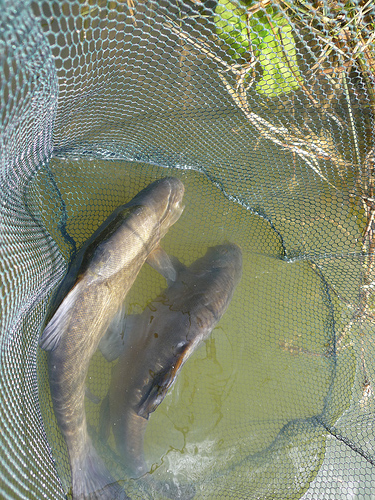

In [77]:
dataset[0][0]